In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
import api_keys
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# ====================== tellmeabout ===============================
# parameters: (data)  *type objects along the way to see their type and size
def tellmeabout(data):
    print(type(data))
    print('length:' + str(len(data)))

 - Twitter data structure/JSON format shown below (ref: Twitter Developer Doc.) 
 - required to examine before an api call to retrieve data from JSON>dict 

In [4]:
# api_json

# {
#   "created_at": "Thu Apr 06 15:24:15 +0000 2017",
#   "id_str": "850006245121695744",
#   "text": "1\/ Today we\u2019re sharing our vision for the future of the Twitter API platform!\nhttps:\/\/t.co\/XweGngmxlP",
#   "user": {
#     "id": 2244994945,
#     "name": "Twitter Dev",
#     "screen_name": "TwitterDev",
#     "location": "Internet",
#     "url": "https:\/\/dev.twitter.com\/",
#     "description": "Your official source for Twitter Platform news, updates & events. Need technical help? Visit https:\/\/twittercommunity.com\/ \u2328\ufe0f #TapIntoTwitter"
#   },
#   "place": {   
#   },
#   "entities": {
#     "hashtags": [      
#     ],
#     "urls": [
#       {
#         "url": "https:\/\/t.co\/XweGngmxlP",
#         "unwound": {
#           "url": "https:\/\/cards.twitter.com\/cards\/18ce53wgo4h\/3xo1c",
#           "title": "Building the Future of the Twitter API Platform"
#         }
#       }
#     ],
#     "user_mentions": []}}

In [5]:
AccountsList = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [6]:
# ====================== MoodPyTwitter ===============================
# ** define a function that will retrieve data from twitter iterating through list of names 
# parameters: (AccountList= input_list, pagecount= scalar value)
# -----------AccountsList =['Twitter', 'Twitter_Developer', 'TwitterHelp] should be series/list for iteration
# -----------pagecount = 5, integer. ** given as 5 on the assignment. 
# ---------------------** run 1-2 for tests 0 to review blank data structure
# moodpy_df = pd.DataFrame({'Date' : [],'SourceName': [],'Texts': [],'VaderComp': [],'VaderNeut': [],'VaderNeg':[]})

def MoodPyTwitter(AccountsList,pagecount):
# reset the output before every use 
    global moodpy_df
    global Copy_Rename_Output_df
    moodpy_df = pd.DataFrame({'Date' : [],'SourceName': [],'Texts': [],'VaderComp': [],'VaderNeut': [],'VaderNeg':[]})
    today = datetime.date.today()

    print(">> #MoodPyTwitter ",today)
# (0)create lists to store api_json data
# reference: above twitter documentation code for JSON keys and data structure of a tweet
    Sources, Texts, DateList, Compounds, Positives, Neutrals, Negatives = [],[],[],[],[],[],[]
# Iter1: iterate through pages input/also a parameter of above defined function  
    for page in range(pagecount):
        print("page %s / %s " % ((page+1),pagecount))
#         print("City weather records: requesting %s of %s | %s" % (rand_city.index(city)+1, city_count+1, city))
        acct_count = len(AccountsList)
        
# Iter2: iterate through all accounts stored in the Accounts (list)
        for account in AccountsList:
            acct_current = AccountsList.index(account)+1
            print("  - User   ",acct_current, " of ",acct_count," ", account, " twitter data retrieving...")

# Request data from Twitter via api call to twitter 
# returns a list (Tweets) of dictionaries
            Tweets= api.user_timeline(account, page=page)     

# Iter3: iterate through each tweet-type: dictionary 
# tweet iterable is a dictionary stored in Tweets list thus need to iterate elements individually
            for tweet in Tweets:
# Iter3(p1)- - - -obtain name-tweet_text-date (source name for re-tweets)
                DateList.append(tweet['created_at'])
                Sources.append(tweet['user']['name'])
                Texts.append(tweet['text'])
# Iter3(p2) - - - Vader analysis on text of each tweet:
                Compounds.append(analyzer.polarity_scores(tweet["text"])["compound"])
                Positives.append(analyzer.polarity_scores(tweet["text"])["pos"])
                Neutrals.append(analyzer.polarity_scores(tweet["text"])["neu"])
                Negatives.append(analyzer.polarity_scores(tweet["text"])["neg"])

    moodpy_df = pd.DataFrame({'Date' : DateList,'SourceName': Sources,'Texts': Texts,'VaderComp': Compounds,'VaderNeut':Neutrals,'VaderNeg':Negatives})
    Copy_Rename_Output_df = moodpy_df.copy()       
    # ====================== MoodPyTwitter: OUTPUT ===============================
    print("\n>> Output ",today)
    print('*  Total of  100  tweets stored in a global variable')
    print('*  Please copy/paste below to rename output dataframe as below') 
    print(" _df = Copy_Rename_Output_df.copy() ")

    return moodpy_df.tail(2)

In [7]:
acct_list = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]
MoodPyTwitter(acct_list,5)

>> #MoodPyTwitter  2018-10-14
page 1 / 5 
  - User    1  of  5   FoxNews  twitter data retrieving...
  - User    2  of  5   CNN  twitter data retrieving...
  - User    3  of  5   BBCWorld  twitter data retrieving...
  - User    4  of  5   CBSNews  twitter data retrieving...
  - User    5  of  5   nytimes  twitter data retrieving...
page 2 / 5 
  - User    1  of  5   FoxNews  twitter data retrieving...
  - User    2  of  5   CNN  twitter data retrieving...
  - User    3  of  5   BBCWorld  twitter data retrieving...
  - User    4  of  5   CBSNews  twitter data retrieving...
  - User    5  of  5   nytimes  twitter data retrieving...
page 3 / 5 
  - User    1  of  5   FoxNews  twitter data retrieving...
  - User    2  of  5   CNN  twitter data retrieving...
  - User    3  of  5   BBCWorld  twitter data retrieving...
  - User    4  of  5   CBSNews  twitter data retrieving...
  - User    5  of  5   nytimes  twitter data retrieving...
page 4 / 5 
  - User    1  of  5   FoxNews  twitter data r

,Date,SourceName,Texts,VaderComp,VaderNeut,VaderNeg
498,Sat Oct 13 15:21:00 +0000 2018,The New York Times,Pope Francis has expelled 2 Chilean bishops ac...,-0.8779,0.558,0.442
499,Sat Oct 13 15:15:12 +0000 2018,The New York Times,RT @PatriciaMazzei: ”Hurricanes don’t respect ...,-0.2263,0.664,0.207


In [8]:
#  per instructions above (output of MoodPyTwitter function)
plot_df = Copy_Rename_Output_df.copy() 
# plot_df.columns ['Date', 'SourceName', 'Texts', 'VaderComp', 'VaderNeut', 'VaderNeg']
plot_df.count()

Date          500
SourceName    500
Texts         500
VaderComp     500
VaderNeut     500
VaderNeg      500
dtype: int64

In [9]:
plot_df.head()

,Date,SourceName,Texts,VaderComp,VaderNeut,VaderNeg
0,Sun Oct 14 08:00:00 +0000 2018,Fox News,"Pastor Andrew Brunson: ""We especially want to ...",0.1935,0.683,0.118
1,Sun Oct 14 07:52:00 +0000 2018,Fox News,".@KamalaHarris, sharp critic of @POTUS, Kavana...",-0.2732,0.884,0.116
2,Sun Oct 14 07:45:01 +0000 2018,Fox News,President @realDonaldTrump to freed American p...,0.7351,0.676,0.000
3,Sun Oct 14 07:38:00 +0000 2018,Fox News,Florida insurers to weather effects of Michael...,0.0000,1.000,0.000
4,Sun Oct 14 07:30:00 +0000 2018,Fox News,"President @realDonaldTrump: ""Chairman Kim was ...",0.6590,0.795,0.000


In [10]:
# before inserting x_axis index values such as -100, -99, -98....0: first need to sort _df by date
plot_df['Date_dt'] = pd.to_datetime(plot_df['Date'])
# above was required in order to create another series without overwriting original data
# helpful for using datetime module functions-if required- and lastly shows data presentable
plot_df = plot_df.sort_values("Date_dt", ascending=False)

In [11]:
# creates a level_0 index where the latest tweet will be zero and the rest will be integer 
# series of single increments 
plot_df = plot_df.reset_index()

In [12]:
# drop index column after above method
plot_df = plot_df.drop(columns='index')

In [23]:
# ====================== TweetPlotVComp ===============================
# ** define a function that will plot summarizing Vader analysis results
#     by scattering Compound index of tweets with respect to age
# parameters: (SortedByDateLatestFirst_df: should be a dataframe sorted with dates/latest on row 0
#              acct_plotlist: a list consisting of twitter accounts pre-Vader_analyzed>to be plotted    

def TweetSplashVComp(SortedByDateLatestFirst_df,acct_plotlist):
    #  ['BBC News (World)', 'CNN', 'CBS News', 'The New York Times', 'Fox News']
    acct_plotlist = [ 'CNN', 'CBS News', 'The New York Times','Fox News']
    plt.figure(figsize=(18,10))
    plt.rcParams["font.size"] = 12
    today = datetime.date.today()
    print(">> #TweetPlotVComp ",today)
    print( 'VADER Compound Index plotted for: ' )    
    
    for source in acct_plotlist:
        #     create a series for each source 
        sourcecomp_series = plot_df[plot_df['SourceName'] == source]['VaderComp']
        #     sort tweets' vader comp with respect to number of how many tweets-distance from latest post
        x_axis = np.arange(-len(sourcecomp_series),0,1)
        plt.scatter(x_axis,sourcecomp_series,
                    edgecolor="black", linewidths=1.5,s=90,alpha=0.8, label= source)
        print( '\t\t ',str(len(sourcecomp_series)),' tweets by', source)
          
             
    plt.xlabel('Last '+  str(len(sourcecomp_series)) + ' tweets\n Latest tweet: 0 to oldest post in requested data set ' )
    plt.ylabel('VADER Analysis Results: Compound Index \n Varies from -1 to +1: least liked and most liked')
    plt.title('TweetPlotVComp shows VADER Analysis results :')   
    plt.legend(loc='best')
    plt.grid()
    print("\n>> Output ",today)
    print('*Y axis> Vader Analysis: Compound index plotted | -1 worst 0 neutral 1 best')
    print('*X axis> Age of Tweets | 0: latest tweet LeftMin: oldest ')
    plt.show()


>> #TweetPlotVComp  2018-10-14
VADER Compound Index plotted for: 
		  100  tweets by CNN
		  100  tweets by CBS News
		  100  tweets by The New York Times
		  100  tweets by Fox News

>> Output  2018-10-14
*Y axis> Vader Analysis: Compound index plotted | -1 worst 0 neutral 1 best
*X axis> Age of Tweets | 0: latest tweet LeftMin: oldest 


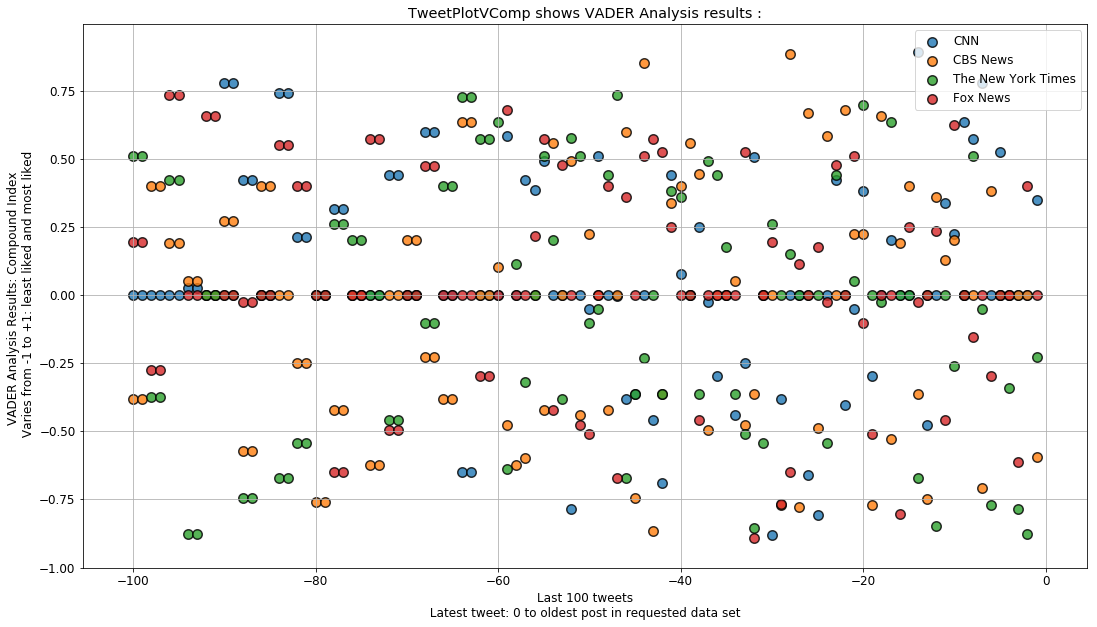

In [24]:
acct_plotlist=  ['BBC News (World)', 'CNN', 'CBS News', 'The New York Times', 'Fox News']
TweetSplashVComp(plot_df,acct_plotlist)

## Overall Sentiment Bar Graph